In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL/'
df=pd.read_csv(outDir+'results/ridge/acc/ALL/acc.csv')
days=pd.read_csv(outDir+'results/ridge/acc/ALL/days/acc.csv')
days_new=days[['Within','Between','Days']]
daysDF=pd.melt(days_new, id_vars=['Days'], value_vars=['Within','Between'], var_name='Analysis',value_name='acc')

permDF=pd.read_csv(outDir+ 'results/ridge/permutation/ALL/diff_acc.csv')


df_re=df.groupby(['train_sub']).mean()

df_re.rename(columns={'cv_acc':'Within','acc':'Between'},inplace=True)

df_re.reset_index(inplace=True)

res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Within', 'Between'],var_name='Analysis',value_name='acc')

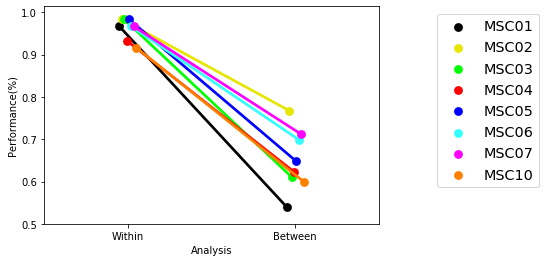

In [3]:
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=res, dodge=.1,order=['Within','Between'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Performance(%)")
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
plt.savefig(thisDir+'output/mL/images/ridge/figs/allTasks_diffSub.png', bbox_inches='tight')

In [6]:
within=res[res.Analysis=='Within'].acc.values
betw=res[res.Analysis=='Between'].acc.values

In [8]:
from scipy import stats
stats.ttest_ind(within, betw)

Ttest_indResult(statistic=11.502449435124568, pvalue=1.6076470634244525e-08)

In [14]:
#within.mean()
within.std()

#betw.mean()
betw.std()

0.06804795123881724

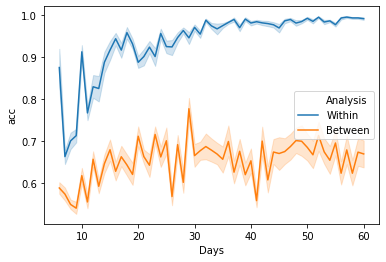

In [22]:
sns.lineplot(x='Days', y='acc', hue='Analysis', data=daysDF)


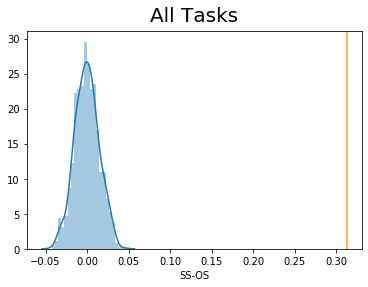

In [33]:
SS=df.cv_acc.mean()
OS=df.acc.mean()
diff=SS-OS

ax=sns.distplot(permDF)
ax.axvline(x = diff,color='orange')
ax.set_title('All Tasks', fontsize=20, pad=10)
ax.set(xlabel='SS-OS')

plt.savefig(thisDir+'output/mL/images/ridge/figs/ALL_SSmOS_plots.png', bbox_inches='tight')

In [37]:
diff

0.3125595238095241

In [38]:
keep=permDF[permDF['diff_acc']>diff]
count=keep.count()
p=(count+1)/1001

In [41]:
p

diff_acc    0.000999
dtype: float64